In [6]:
# IMPORTS

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import tensorflow as tf
import lightkurve as lk

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import astropy
from astropy.timeseries import TimeSeries


['lightcurve_2MASSJ20494917+4410462.txt', 'lightcurve_2MASSJ20513057+4403449.txt', 'lightcurve_LkHa146.txt', 'lightcurve_V1598Cyg.txt', 'lightcurve_V1706Cyg.txt']


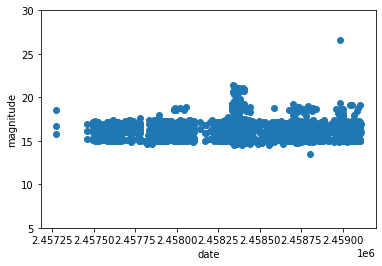

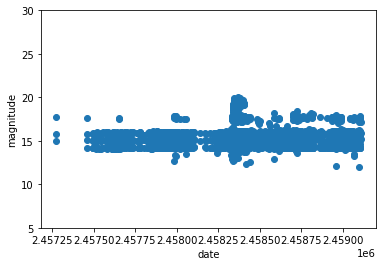

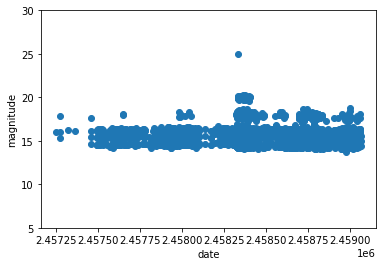

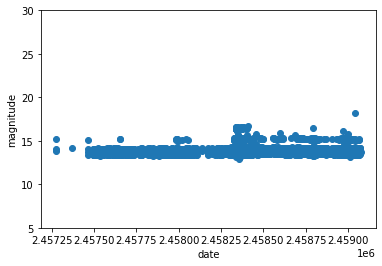

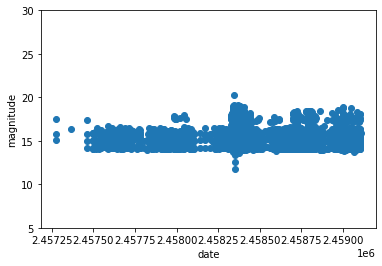

In [7]:
# FETCH DATA

lc_exo_folder = "./LIGHTCURVES/" # create one for lightcurves with no exoplanets
lc_exo_dir = os.listdir(lc_exo_folder)
lc_exo_plots = "./lightcurvePLOTS/has_exoplanets/"
print(lc_exo_dir)

# PLOT AND SAVE TO FOLDER

for x in lc_exo_dir:
    lc_exo_df = pd.read_csv(os.path.join(lc_exo_folder, x), comment="#", delimiter=" ")
    mag = lc_exo_df["calibrated_magnitude"]
    date = lc_exo_df["date"]
    plt.scatter(date,mag)
    plt.ylim([5,30])
    plt.xlabel("date")
    plt.ylabel("magnitude")
    plt.savefig(os.path.abspath(lc_exo_plots) + "/lc_exo_" + str(lc_exo_dir.index(x)) + ".png")
    plt.show()


In [8]:
# USER INPUT TARGET STAR AND MISSION

test_df = str(input("Enter your target: "))
test_df1 = str(input("Enter mission: "))

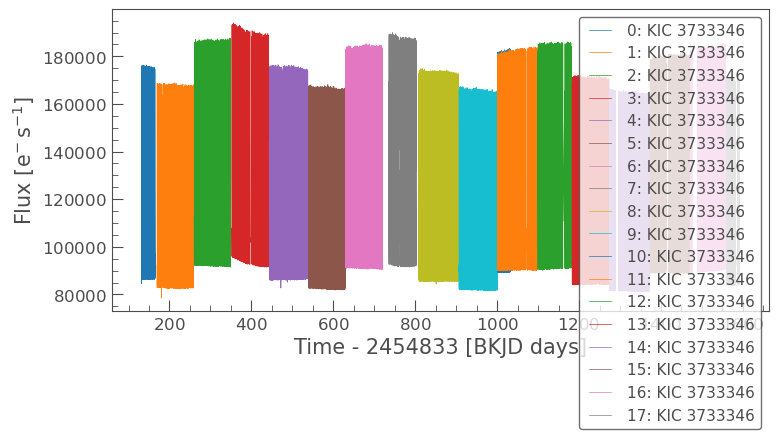

In [9]:
# FIND, PLOT AND SAVE TEST DATA

test_plot_dir = "./testPLOTS/"

testsearch = lk.search_lightcurve(test_df,author=test_df1)
lc_test = testsearch.download_all()

lc_test.plot()
plt.savefig(os.path.abspath(test_plot_dir) + "/lc_testplot.png")

In [10]:
# CREATE TRAIN AND TEST DATASETS

train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_ds = train.flow_from_directory(
    os.path.abspath(lc_exo_plots),
    target_size=(150,150), # maybe change target size? check file structure is correct
    batch_size = 32,
    class_mode = 'binary')

test_ds = test.flow_from_directory(
    os.path.abspath(test_plot_dir),
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'binary')

# BUILD CNN MODEL

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation="relu"))

model.add(keras.layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

# TRAIN DATA

model.fit_generator(
    train_ds,
    steps_per_epoch = 250,
    epochs = 10,
    validation_data = test_ds
)

# PREDICTIONS (FUNCTION)

def predictExo(filename):
    img = image.load_img(filename,target_size=(150,150))
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)

    val = model.predict(X)
    print(val)

    if val == 1:
        plt.xlabel("Exoplanet detected!",fontsize=30)
    elif val == 0:
        plt.xlabel("No exoplanet detected.",fontsize=30)

predictExo(lc_test)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


/tmp/ipykernel_354/146021804.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


ValueError: Asked to retrieve element 0, but the Sequence has length 0